In [1]:
import os

os.environ["TPU_CHIPS_PER_HOST_BOUNDS"] = "1,1,1"
os.environ["TPU_HOST_BOUNDS"] = "1,1,1"
# Different per process:
os.environ["TPU_VISIBLE_DEVICES"] = "0"

# Hard EM - VAE: Fashion MNIST

In this notebook, we test the effectiveness and speed of hard-EM applied to a factor analysis and homoskedastic encoder.

We test this notebook considering an adam optimiser for both the VAE and the E and M steps of DLM hard EM.

# Fitting a distribution $q_n$ given $\boldsymbol\theta$

In this section, we find a variational distribution $q_n$ for $\boldsymbol\theta_\text{vae}$ and $\boldsymbol\theta_\text{hard-em}$. We consider a dataset ${\bf X}_\text{test}$ and train an unamortised variational distribution of the form

$$
    q_n(z_n) = \mathcal{N}(z_n \vert \mu_n, \sigma_n)
$$

In [3]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = "retina"

In [5]:
with open("../results-full.pkl", "rb") as f:
    output = pickle.load(f)

# Comparing IWMLL

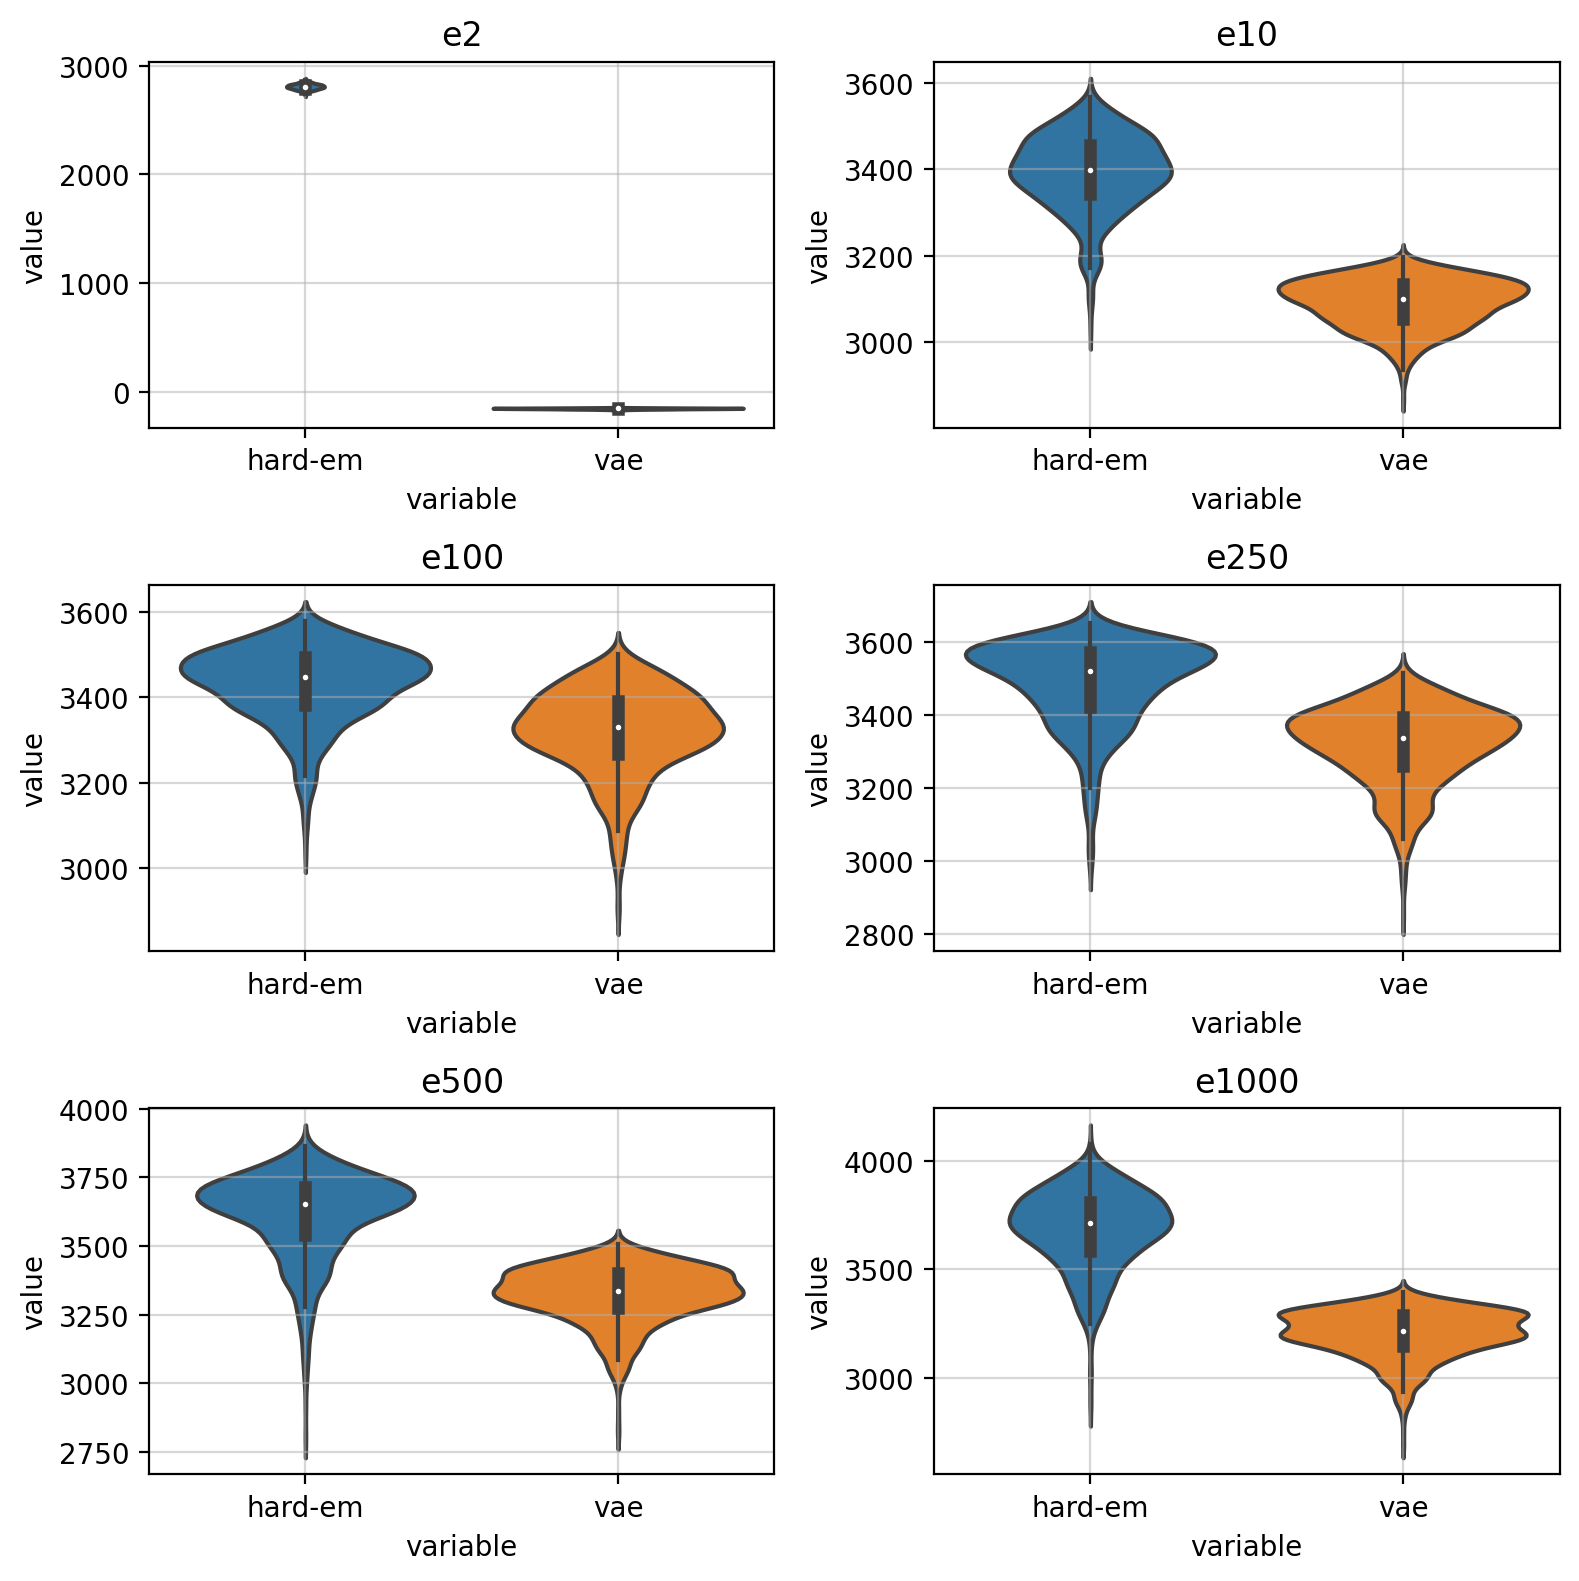

In [6]:
fig, axs = plt.subplots(3, 2, figsize=(8, 8))

dict_mll_epochs = output["test"]
for ax, key in zip(axs.ravel(), dict_mll_epochs):
    df_mll = pd.DataFrame.from_dict(dict_mll_epochs[key])
    df_mll.columns = ["hard-em", "vae"]
    sns.violinplot(df_mll.melt(), x="variable", y="value", ax=ax)
    ax.grid(alpha=0.5)
    ax.set_title(key)
    
# axs[-1, -1].axis("off")
plt.tight_layout()